In [4]:
import matplotlib
from matplotlib import font_manager, rc
import platform

try :
    if platform.system() == 'windows':
        # windows의 경우
        font_name = font_manager.FomntProperties(fname="c:/Windows/Font")
        rc('font', family = font_name)
    else:
        # mac의 경우
        rc('font', family = 'AppleGothic')
except :
    pass

matplotlib.rcParams['axes.unicode_minus'] = False

###### 엣지 추출
    경계선을 인지하는 것 엣지 추출(edge detection)이라고 한다. 엣지(경계선)는 이미지 안에서 픽셀의 값이 갑자기 변하는 곳이다. 따라서 엣지 추출을 하는 알고리즘은 이미지를 미분한 그레디언트(gradient) 벡터의 크기로 판단한다. 대표적인 엣지 추출 알고리즘으로 Sobel edge Detection과 Canny edge Detection이 있다.

    OpenCV에서 Sobel edge Detection Sobel, Laplacian 명령으로 구현한다.

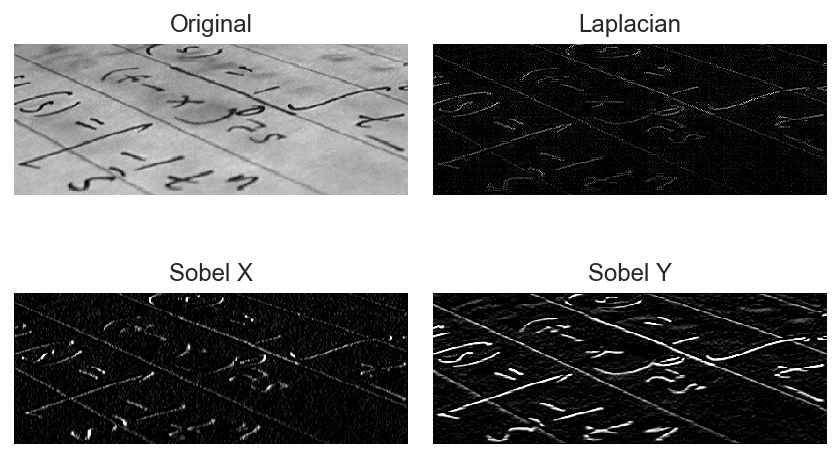

In [2]:
from skimage.data import text
import cv2

img = text()

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

###### 캐니 엣지 추출

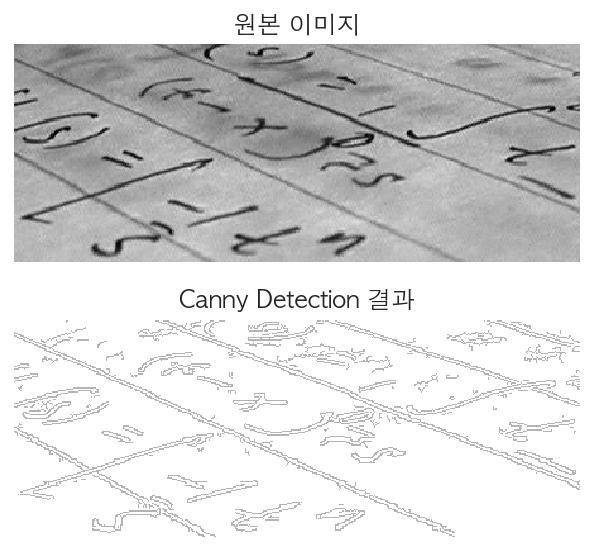

In [5]:
img = text()
edges = cv2.Canny(img, 50, 100)

plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.3)
plt.axis('off')
plt.title("Canny Detection 결과")
plt.tight_layout()
plt.show()

###### 해리스 코너 추출

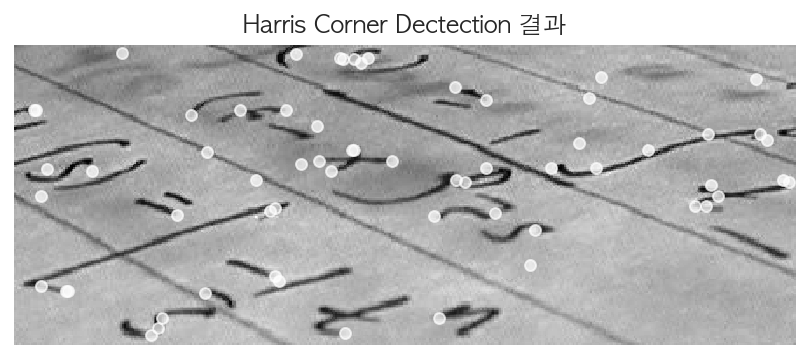

In [6]:
dst = cv2.cornerHarris(img, 2, 3, 0.24)

# thresholding
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)

x, y = np.nonzero(dst)

plt.figure(figsize=(7,7))
plt.title("Harris Corner Dectection 결과")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c="w", alpha=0.7)
plt.show()

###### Shi & Tomasi 코너 추출

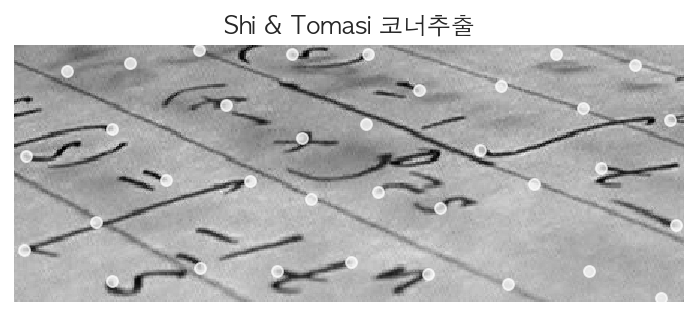

In [7]:
corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)
corners = np.int0(corners)

plt.title("Shi & Tomasi 코너추출")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c="w", alpha=0.7)
plt.axis("off")
plt.show()

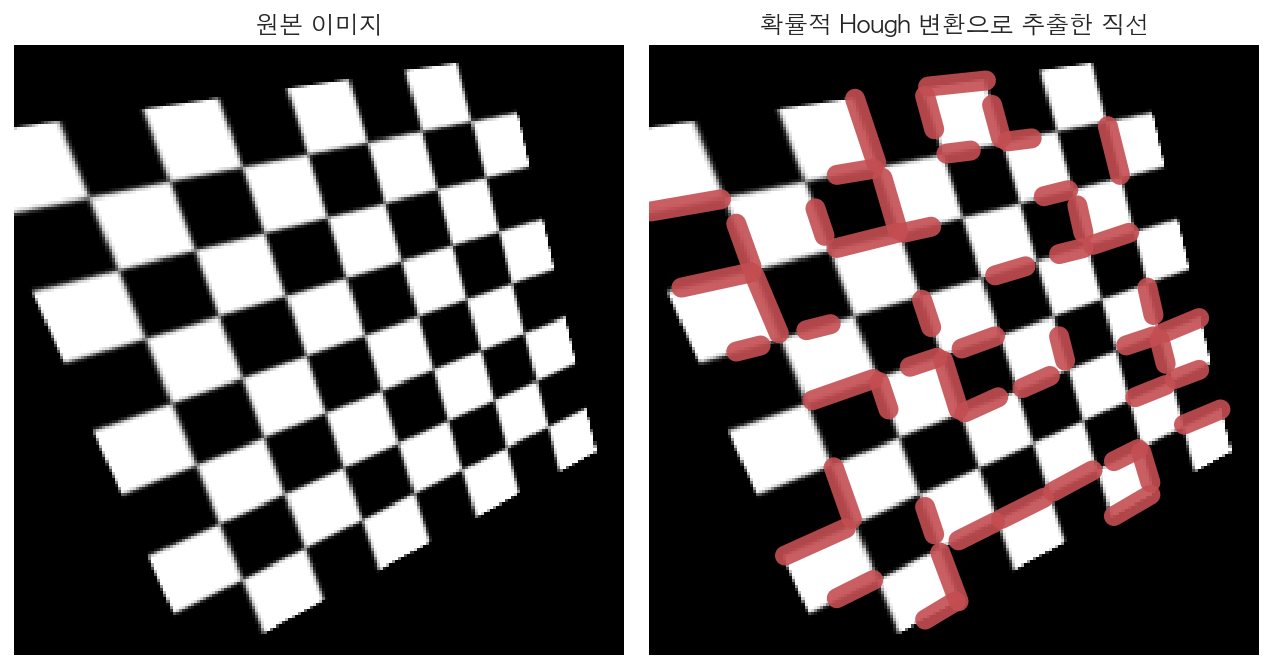

In [8]:
from skimage.data import checkerboard

img = checkerboard()
rows, cols = img.shape

pts1 = np.float32([[25, 25], [175, 25], [25, 175], [175, 175]])
pts2 = np.float32([[25, 50], [150, 25], [75, 175], [175, 125]])

H = cv2.getPerspectiveTransform(pts1, pts2)
img = cv2.warpPerspective(img, H, (cols, rows))

edges = cv2.Canny(img, 100, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50, 8)

plt.figure(figsize=(9, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("원본 이미지")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img, cmap="gray")
plt.axis("off")
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c='r', lw=10, alpha=0.9)
plt.title("확률적 Hough 변환으로 추출한 직선")

plt.tight_layout()
plt.show()

###### 이미지 히스토그램

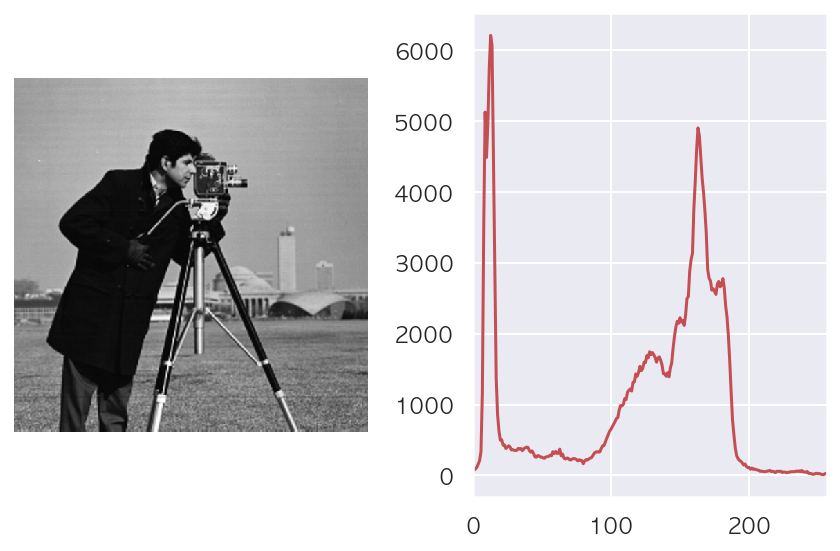

In [9]:
from skimage.data import camera
img = camera()

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.subplot(121)
plt.imshow(img, "gray")
plt.axis("off")
plt.subplot(122)
plt.plot(hist, color='r')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

그레디언트 히스토그램 설명자¶
특징점의 주변 특성을 이용해 해당 특징점을 표현하는 벡터를 만들어 이미지에서 같은 특징점을 매칭하거나 추출 할 때 사용한다. 이를 설명자(descriptor)라고 한다. 방법은 다음과 같다.

특징점을 중심으로 16x16 영역을 4x4 크기의 16개 윈도우로 나눈다.
윈도우의 16개 포인트에서 그레디언트 벡터의 크기와 방향을 계산한다.
그레디언트 벡터의 방향을 8개의 각도로 라운딩(rouding)한다.
8개의 각도에 대해 그레디언트 벡터의 크기를 더하여 일종의 그레디언트 히스토그램을 만든다.
윈도우 16개의 히스토그램을 모두 모으면, 특징점 주변에 대한 정보가 128(8 x 16)차원의 벡터로 표현된다.

In [11]:
from skimage.data import camera
img = camera()

rows, cols = img.shape
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)
img_rotated = cv2.warpAffine(img, H, (cols, rows))
sift = cv2.xfeatures2d.SIFT_create()
kps, des = sift.detectAndCompute(img, None)
kps_r, des_r = sift.detectAndCompute(img_rotated, None)
kp0 = kps[0]
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[1], kp0.size, kp0.angle))

AttributeError: module 'cv2.cv2' has no attribute 'xfeatures2d'